# Lesson 4.1 Exploring data with ggplot

This lesson will review how we can use ggplot to explore a data frame with continuous variables and one column of a categorical variable. 

## Read in data and preview 
Below is the data that the forestry managers have been collecting from the different site:

In [2]:
library(tidyverse)

site_1 <- read.csv("site_1.csv")
site_2 <- read.csv("site_2.csv")
site_3 <- read.csv("site_3.csv")
site_4 <- read.csv("site_4.csv")

# preview using str()
str(site_1)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


'data.frame':	15 obs. of  3 variables:
 $ age         : int  20 30 40 50 60 70 80 90 100 110 ...
 $ board_feet  : num  0 6041 17490 31906 44130 ...
 $ tree_density: int  0 165 278 322 308 279 250 224 204 186 ...


🧠✍️**Class Questions:** (*hint: edit code above to see different sites*) 

* What are the dimensions of the data from each site? 
* What variables does the data you just loaded in contain? 
* What do these variables mean in the context of forestry management?
* How could this data be used to determine which site is the best choice for forestry? 

### Summary statistics
Now lets start to explore the differences between the sites with summary statistics. 

🧠✍️**Class Question:**

* What statistics would help you explore the difference in productivity between the different sites? 

You can use the following chunk to perform whichever summary statistics you would find helpful. 

In [ ]:
# write code to get summary statistics here 

🧠✍️**Class Questions:**

* Based on these summary statistics, which site seems like the best site so far? 
* Is there any other information you would like to consider about these sites that was not provided in this data set?

## Combining data frames 

Now that you've loaded in and explored that data from each of the sites, it will be useful to combine it in one large data set. We will use `mutate()`, similar to the previous module, to create a new column to identify each site. 

Then we will combine the rows using `rbind()`. This function combines all the data vertically, but in order to do so, all data frames must have the same column names. 

In [4]:
# create new column site_ID 
site_1_new <- site_1 %>%
  mutate(site_ID = 1)
site_2_new <- site_2 %>%
  mutate(site_ID = 2)
site_3_new <- site_3 %>%
  mutate(site_ID = 3)
site_4_new <- site_4 %>%
  mutate(site_ID = 4)

# combine rows with rbind
forest<- rbind(site_1_new, site_2_new, site_3_new, site_4_new)

# preview it 
head(forest)

,age,board_feet,tree_density,site_ID
,<int>,<dbl>,<int>,<dbl>
1,20,0.000,0,1
2,30,6041.434,165,1
3,40,17490.338,278,1
4,50,31906.178,322,1
5,60,44130.086,308,1
6,70,56994.003,279,1


### Calculate site averages 

Now calculate the mean board feet at each site from the new combined data. Similar to previous modules, use `group_by()` and `summarize()`

In [5]:
#Use this chunk to calculate the mean board_feet from the combined data
forest %>% 
  group_by(site_ID) %>% 
  summarize(mean_board_feet = mean(board_feet))

site_ID,mean_board_feet
<dbl>,<dbl>
1,65852.45
2,120152.80
3,29140.57
4,107196.58


## Exploring data with plots 

In order to compare the different sites, we want to use the variable `site_ID` in our plots. Even though we know that it is a discrete value we are using as an ID, R recognizes this variable as a double which will cause issues when trying to plot it as a category. In order to fix this, we are going to save `site_ID` as a factor. Factors in R are categorical variables that can be stored in levels.

### Boxplot 

We are using two columns to plot a boxplot - `site_ID` is a discrete category, and the `board_feet` is a continuous variable. The boxplots will show the distribution of values and statistics for `board_feet` at each site.

Create a boxplot with the `forest` dataframe showing `site_ID` on the x-axis, and `board_feet` on the y-axis.

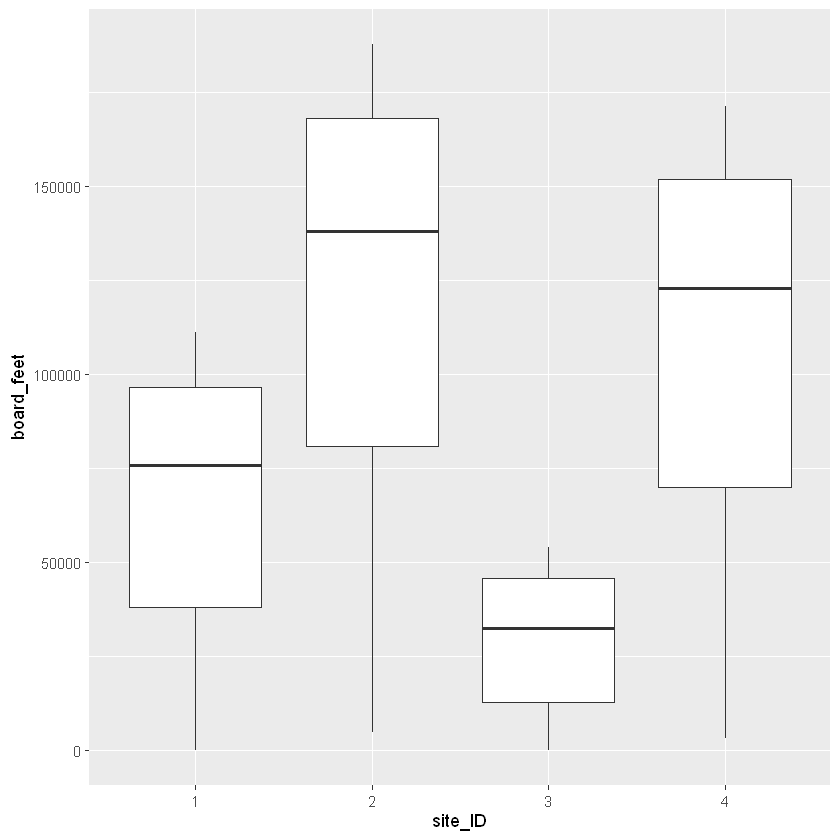

In [10]:
# make site ID a factor 
forest$site_ID <- as.factor(forest$site_ID)

# plot using ggplot and geom_boxplot()
ggplot(forest) + geom_boxplot(aes(x=site_ID, y=board_feet))

### Scatter plot 

Our data frame also contains an `age` column, which represents years, and could be treated as continuous or discrete. In this case, to create a time series, we can treat it as continous, and use it in a scatter plot. Scatter plots typically show the relationship between two continuous variables.  

Create a scatter plot with the `forest` dataframe of `board_feet` v. `age`, with `site_ID` as color or shape,  using `geom_point()` 

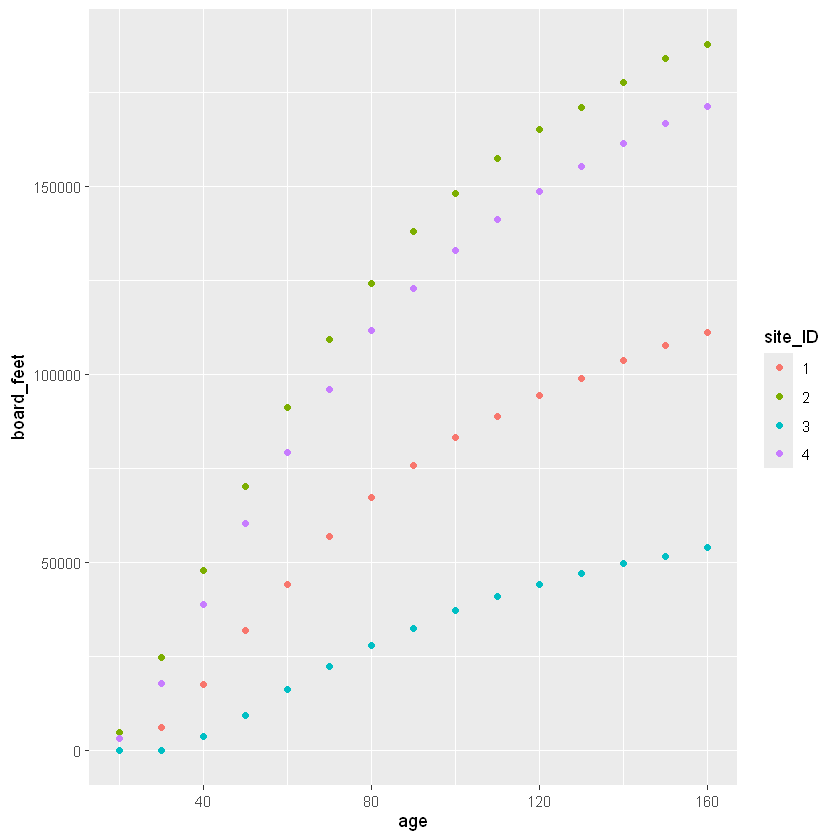

In [12]:
ggplot(forest) + geom_point(aes(y=board_feet, x=age, col=site_ID))

## Lesson 4.1 Recap: 

This lesson has reviewed: 

- loading in and previewing data
- summary statistics
- reformatting data with `mutate`, `rbind`, `group_by`, and `summarize`
- plotting data with `ggplot` boxplot and scatter plot 

You have now explored the data in many different ways. Based on the information from the summary statistics, graph, and descriptions of the sites, which site would you recommend as the best for a lumber harvest and why?